<center><img src='../assets/images/aau_logo.png' width='10%'></center>

<br>
<center><h3>Addis Ababa University
<br>College of Natural and Computational Sciences
<br>Department of Computer Science</h3></center>

---
<center><h1 style="font-weight: bold;">CoSc 6262: Data Science</h1></center>
<center><img src='../assets/images/sklearn_logo.png' width='25%'></center>
<br>
<center><h2>Assignment 6: sklearn</h2></center>

---

* In these exercises we will use the well known Titanic dataset from kaggle.
* You can get this from here: https://www.kaggle.com/c/titanic/data
* The file to download is train.csv but I will put it up on slack to avoid confusion.

With this dataset you will train a classifier to predict whether or not passengers on the Titanic survived

In [3]:
import numpy as np
import pandas as pd

## Data Cleaning

There is some preprocessing required before you are ready to use the data to train a classifier.
Run the cells below to read in the data and do the data cleaning.
The data cleaning code has already been entered so you don't have to worry too much about it.

In [4]:
import sklearn

In [5]:
df=pd.read_csv('../assets/data/titanic/train.csv')

### Checking out our data set

Looking at the first few lines it is clear that some of the data elements are unlikely to be very useful in making a prediction. We will remove the PassengerID, Name, Ticket, Cabin, and Embarked columns in order to remove unnecessary features and to simplify the dataset a little.

Also, note that the gender column contains values 'male' and 'female'. We must convert these values to something numeric as sklearn does not take non numeric feature values. We assign 0 for male and 1 for female.

We also fill in NaN values in the Age column with the median value (sklearn also will not accept NaN values). 

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})
df["Age"] = df["Age"].fillna(df["Age"].median())

In [8]:
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']
del df['Embarked']

Looking at out dataset after some preprocessing, we see that all our features are now numeric

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


We must convert our data to ndarrays in order to use sklearn. 

In [10]:
y = df['Survived'].values

X_df = df.copy()
del X_df['Survived']
X = X_df.values

Once you have run the cell above, you have a feature matrix X and a vector of target values y. Both of these are type ndarray. You can go ahead and use these to train a classifier on.

## Questions

### Question 1

Do a test train split on your data and setting 30% of the data for a test set

In [11]:
from sklearn.model_selection import train_test_split

# Split X and y with 30% of data in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (623, 6)
X_test shape: (268, 6)
y_train shape: (623,)
y_test shape: (268,)


### Question 2

Train a LogisticRegression classifier using your training data from the previous question.
You can use google or look at the documentation on sklearn if you want more info on how to do logistic regression in sklearn but it is very similar to the linear regression we did in class.

Once you have trained the model, use it to make predictions on the test set and use the sklearn metrics library to calculate precision recall and f1 scores.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

# Calculate metrics
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Logistic Regression Metrics:")
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)

Logistic Regression Metrics:
Precision: 0.8144329896907216
Recall: 0.7117117117117117
F1 Score: 0.7596153846153846


### Question 3

Now repeat everything in question 2 but use a RandomForestClassifier

Which of these two algorithms makes better predictions?

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate metrics for random forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Classifier Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier Metrics:
Precision: 0.7523809523809524
Recall: 0.7117117117117117
F1 Score: 0.7314814814814815


In [14]:
print("\nComparison:")
print("F1 Score of Logistic Regression:", f1_log)
print("F1 Score of Random Forest Classifier:", f1_rf)

if f1_rf > f1_log:
    print("\nRandom Forest Classifier makes better predictions based on F1 score.")
else:
    print("\nLogistic Regression makes better predictions based on F1 score.")


Comparison:
F1 Score of Logistic Regression: 0.7596153846153846
F1 Score of Random Forest Classifier: 0.7314814814814815

Logistic Regression makes better predictions based on F1 score.


## Additional Cells

### Feature importances

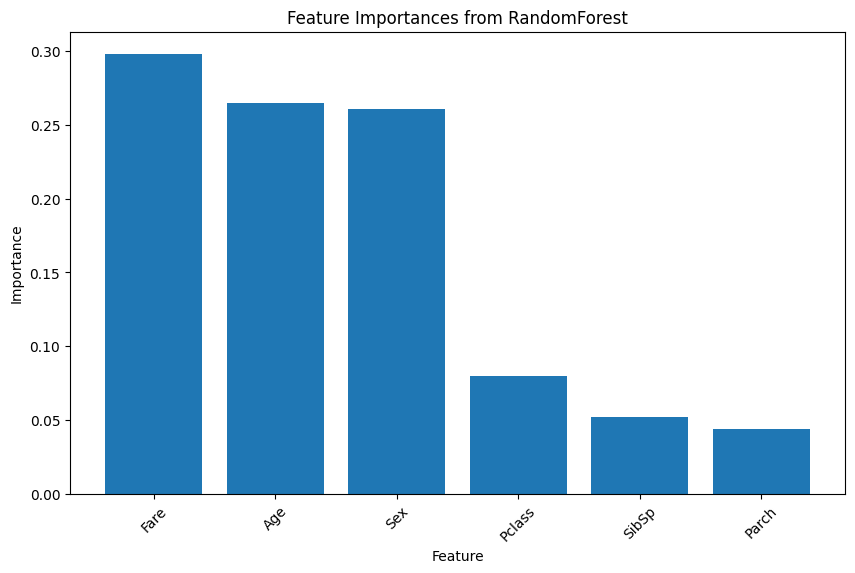

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names using the original DataFrame that was used to build X
feature_names = X_df.columns

# Get feature importances from random forest classifier
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from RandomForest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Confusion matrix for the random forest

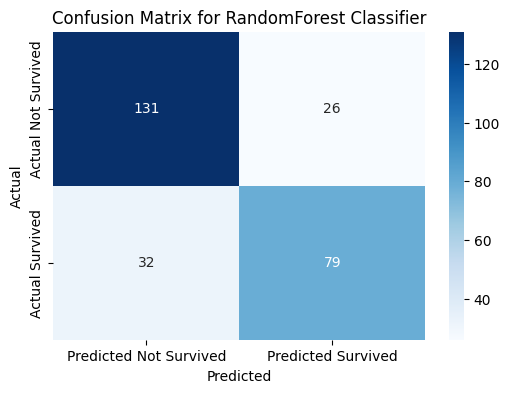

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.title("Confusion Matrix for RandomForest Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### ROC curve for the logistic regression

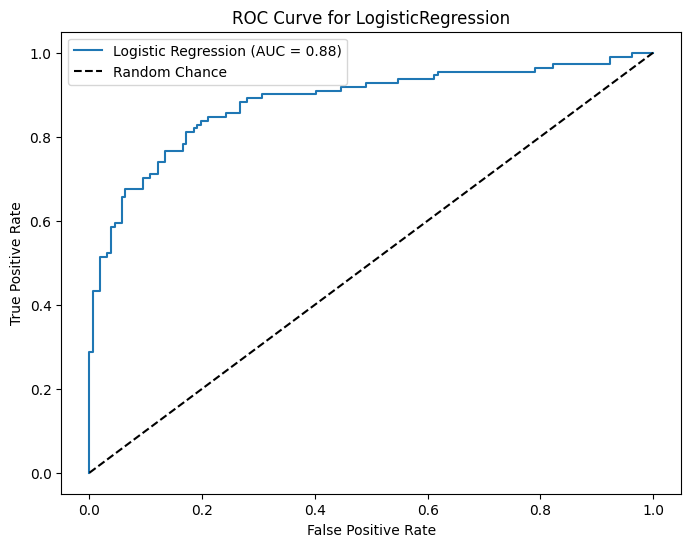

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions and compute ROC Curve for logistic regression
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
auc_score = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LogisticRegression")
plt.legend()
plt.show()